## BACKTESTING STRATEGIES

## 1. DCA simple (frecuencia semanal y mensual)

## Conclusiones

* No existe diferencia significativa en el retorno entre los días de la semana.
* Se obtiene un mayor retorno realizando compras mensuales, de aproximadamente 8 puntos porcentuales
* El mejor día del mes es el 24 para el período de 2021, para el histórico total es el día 15.

In [344]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
from datetime import datetime, date, timedelta
import math
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

import statistics as s

import seaborn as sns
sns.set()
sns.set_theme()

In [345]:
# Lectura de datos
start = datetime(1900,1,1)
end = datetime.now()
data = pdr.get_data_yahoo('BTC-USD', start, end, interval='d')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-11-24,57803.066406,55964.222656,57565.851562,56280.425781,3.663557e+10,56280.425781
2021-11-25,59367.968750,57146.683594,57165.417969,57274.679688,3.428402e+10,57274.679688
2021-11-26,59183.480469,53569.765625,58960.285156,53569.765625,4.181075e+10,53569.765625


In [346]:
def cagr(df):
    """
    cagr [retorna el CAGR en un DataFrame]
    [Una tasa de crecimiento anual compuesto (CAGR) mide la tasa de retorno de una inversión (como un fondo de inversión o un bono) durante un período de inversión, como 5 o 10 años]
    Args:
        df ([DataFrame]): [DataFrame obtenido al leer los datos del activo de interés]
    """
    df = df.copy()
    df = df.sort_index(ascending=True)
    df['cum_return'] = (1 + df['btc_return']).cumprod()
    total_ret = df['cum_return'][-1]

    start = datetime.utcfromtimestamp(df.index.values[0].astype('O')/1e9)
    end = datetime.utcfromtimestamp(df.index.values[-1].astype('O')/1e9)
    period_years = (end - start).days / 365.25
    CAGR = (total_ret)**(1/period_years)-1
    return CAGR

In [347]:
# Crear variables y subset para análisis
df = data[['Adj Close']]['2017':'2021'].copy()
df = df.rename(columns={'Adj Close': 'btc_price'})
df['btc_return'] = df['btc_price'].pct_change()
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df

,btc_price,btc_return,day,weekday,month,year
Date,,,,,,
2017-01-01,998.325012,NaN,1,6,1,2017
2017-01-02,1021.750000,0.023464,2,0,1,2017
2017-01-03,1043.839966,0.021620,3,1,1,2017
2017-01-04,1154.729980,0.106233,4,2,1,2017
2017-01-05,1013.380005,-0.122410,5,3,1,2017
...,...,...,...,...,...,...
2021-11-24,56280.425781,-0.022384,24,2,11,2021
2021-11-25,57274.679688,0.017666,25,3,11,2021
2021-11-26,53569.765625,-0.064687,26,4,11,2021


In [348]:
print(data['Adj Close'][-1])
print(s.harmonic_mean(df['btc_price']))
cagr(df)

57645.96484375
5323.958698939505


1.2847177275132613

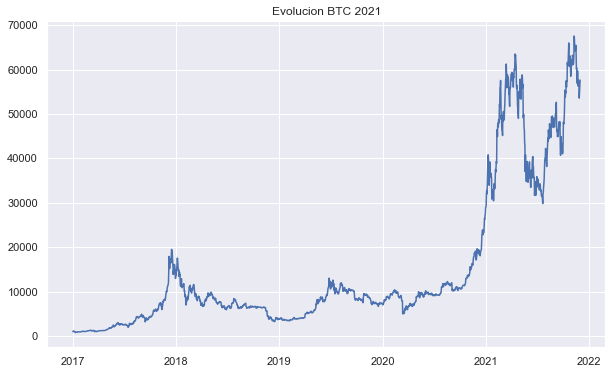

In [349]:
# Evolución BTC
plt.figure(figsize=(10,6))
plt.plot(df.index, df['btc_price'])
plt.title('Evolucion BTC 2021')
plt.grid(True)

Text(0.5, 1.0, 'Evolución retornos BTC')

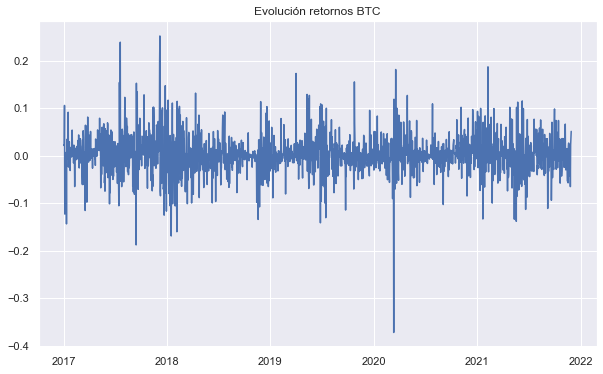

In [350]:
# Evolución returns
plt.figure(figsize=[10,6])
plt.plot(df.index, df['btc_return'])
plt.title('Evolución retornos BTC')

In [351]:
statistics_returns = df['btc_return']['2021'].describe()
#statistics_returns['q1'] = df['btc_return'].quantile(0.25)
#statistics_returns['q3'] = df['btc_return'].quantile(0.75)
statistics_returns['IQR'] = statistics_returns['75%'] - statistics_returns['25%']
statistics_returns['AI'] = statistics_returns['25%'] - 1.5 * statistics_returns['IQR']
statistics_returns['AS'] = statistics_returns['75%'] + 1.5 * statistics_returns['IQR']
statistics_returns['AextI'] = statistics_returns['25%'] - 3 * statistics_returns['IQR']
statistics_returns['AextS'] = statistics_returns['75%'] + 3 * statistics_returns['IQR']
print(statistics_returns)
Atipico_Inf = statistics_returns['AI']/statistics_returns['std']
Atipico_ext_inf = statistics_returns['AextI']/statistics_returns['std']
print(Atipico_Inf,Atipico_ext_inf)

count    332.000000
mean       0.002986
std        0.042892
min       -0.137661
25%       -0.021902
50%        0.002371
75%        0.026347
max        0.187465
IQR        0.048249
AI        -0.094275
AS         0.098721
AextI     -0.166648
AextS      0.171094
Name: btc_return, dtype: float64
-2.1979518072996265 -3.8852842333109763


In [352]:
#df[(df['btc_return'] < 0.04) & (df['btc_return'] > -0.04)]
df[(df['btc_return'] < -1.7*0.04)]


,btc_price,btc_return,day,weekday,month,year
Date,,,,,,
2017-01-05,1013.380005,-0.122410,5,3,1,2017
2017-01-06,902.200989,-0.109711,6,4,1,2017
2017-01-11,777.757019,-0.143136,11,2,1,2017
2017-03-17,1100.229980,-0.073732,17,4,3,2017
2017-03-18,973.817993,-0.114896,18,5,3,2017
...,...,...,...,...,...,...
2021-05-28,35697.605469,-0.071269,28,4,5,2021
2021-06-21,31676.693359,-0.112655,21,0,6,2021
2021-06-25,31637.779297,-0.087260,25,4,6,2021


## Weekly frequency

In [353]:
usdt = 50
initial_usdt = []
final_usdt = []
usdt_return = []
dca_r = []
cagr_value = []


for i in range(7):
    df_sem = df[df['weekday']==i]
    df_sem['btc_return'] = df_sem['btc_price'].pct_change()
    df_sem['usdt_invested'] = usdt
    df_sem['btc_amount'] = df_sem['usdt_invested']/df_sem['btc_price']
    
  
    #metrics
    total_btc_amount = df_sem['btc_amount'].sum()
    
    total_usdt_invested = df_sem['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*df['btc_price'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

    dca_return = (df['btc_price'][-1]/s.harmonic_mean(df_sem['btc_price'])-1)*100
    dca_r.append(round(dca_return,2))

    btc_cagr = cagr(df_sem)
    cagr_value.append(round(btc_cagr,2))

    

initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
dca_r  = pd.DataFrame(dca_r, columns=['dca_return'])
cagr_value = pd.DataFrame(cagr_value, columns=['cagr'])

resultados_sem = pd.concat([initial_usdt, final_usdt, usdt_return, dca_r, cagr_value], axis=1)
resultados_sem

    

,total_usdt_invested,total_usdt_obtained,total_return,dca_return,cagr
0,12800,138813.1,984.48,984.48,1.27
1,12750,137708.8,980.07,980.07,1.27
2,12800,138012.8,978.22,978.22,1.22
3,12800,137917.8,977.48,977.48,1.28
4,12700,137672.8,984.04,984.04,1.31
5,12800,137908.2,977.41,977.41,1.31
6,12800,140499.9,997.66,997.66,1.30


In [354]:
best_day = resultados_sem['cagr'].idxmax()
max_weekly_return = resultados_sem['dca_return'].max()
cagr_sem_max = resultados_sem['cagr'].max()


## Monthly frequency

In [355]:
usdt = 200
initial_usdt = []
final_usdt = []
usdt_return = []
cagr_value = []
plt.figure(figsize=(20,10))


for i in range(31):
    df_mes = df[df['day']==i+1]
    df_mes['btc_return'] = df_mes['btc_price'].pct_change()
    df_mes['usdt_invested'] = usdt
    df_mes['btc_amount'] = df_mes['usdt_invested']/df_mes['btc_price']

    #metrics
    total_btc_amount = df_mes['btc_amount'].sum()
    
    total_usdt_invested = df_mes['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*data['Adj Close'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

    btc_cagr = cagr(df_mes)
    cagr_value.append(round(btc_cagr,2))



initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
cagr_value = pd.DataFrame(cagr_value, columns=['cagr'])

resultados_mes = pd.concat([initial_usdt, final_usdt, usdt_return, cagr_value], axis=1)
resultados_mes


,total_usdt_invested,total_usdt_obtained,total_return,cagr
0,11800,131919.0,1017.96,1.34
1,11800,129847.0,1000.40,1.35
2,11800,128295.0,987.25,1.34
3,11800,127533.8,980.79,1.28
4,11800,128004.4,984.78,1.34
5,11800,127995.5,984.71,1.40
6,11800,127906.7,983.95,1.41
7,11800,127660.4,981.87,1.44
8,11600,126921.0,994.15,1.44
9,11800,129687.9,999.05,1.42


<Figure size 1440x720 with 0 Axes>

día máximo: 10
retorno máximo: 1020.87


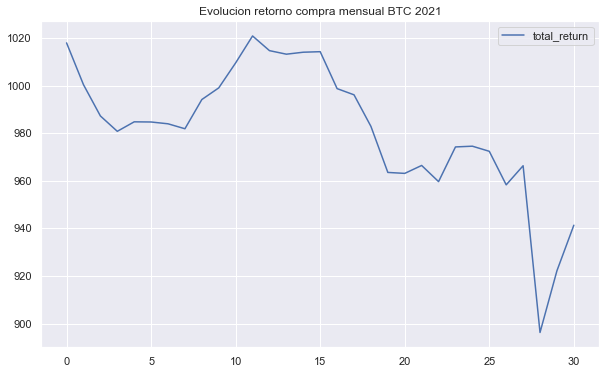

In [356]:
plt.figure(figsize=(10,6))
plt.title('Evolucion retorno compra mensual BTC 2021')
plt.plot(resultados_mes.index, resultados_mes['total_return'], label='total_return')
plt.legend()
dia_maximo = resultados_mes['cagr'].idxmax()
retorno_maximo = resultados_mes['total_return'].max()
cagr_mes_max = resultados_mes['cagr'].max()
print(f'día máximo: {dia_maximo}')
print(f'retorno máximo: {retorno_maximo}')

In [357]:
results = pd.DataFrame({'cagr': [cagr_sem_max, cagr_mes_max], 'return': [max_weekly_return, retorno_maximo ] , 'Best_day': [best_day, dia_maximo]}, index=['weekly_freq', 'Montly_freq'])
results

,cagr,return,Best_day
weekly_freq,1.31,997.66,4
Montly_freq,1.50,1020.87,10
